# Trabajo práctico final para la Materia Inteligencia Artificial - IUA - 2021

## Este trabajo tiene como finalidad aplicar los siguientes conceptos:

*   Regresión
*   Redes Neuronales
*   Árboles de Decisión
*   Modelos de Ensamble
*   Suport Vector Machines
*   Validación de Modelos


El trabajo se va a seguir realizando en grupos igual o menores de 3 participantes.

La fecha de entrega del mismo es 25 de noviembre del 2021.

Tener en cuenta que **este trabajo no reemplaza al examen final**, sino que va a *representar el 50% de la misma* (equivalente a la parte práctica del final).

**La nota de este trabajo se puede guardar hasta febrero del 2022.** Para finales posteriores a esa fecha, van a tener que realizar la parte práctica correspondiente en ese momento.











In [ ]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import sklearn as skl

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, mean_squared_log_error
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/melicaffa/practicos/main/Walmart_Store_sales.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'])

## Descripción del Dataset

Este dataset presenta datos históricos de ventas de tiendas Walmart de Estados Unidos entre el periodo comprendido desde 05/2/2010 hasta 01/11/2012. Presenta las siguientes columnas:

**Store** - nro de tienda

**Date** - fecha

**Weekly_Sales** - ventas semanales en determinada tienda

**Holiday_Flag** - si dicha semana presenta alguna festividad: 1 – hay una festividad, 0 – no hay festividad

**Temperature** - temperatura en grados fahrenheit

**Fuel_Price** - costo del combustible en la región

**CPI** – Índice de precios al consumidor predominante

**Unemployment** - Tasa de desempleo predominante

In [ ]:
# Visualizamos las columnas y sus respectivos tipos de datos
pd.DataFrame(dataset.dtypes, columns=['Type']).T

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Type,int64,datetime64[ns],float64,int64,float64,float64,float64,float64


In [ ]:
# Visualizamos las estadísticas de las columnas
dataset.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
# Creamos más variables con los siguientes datos
dataset['Day'] = dataset['Date'].dt.day
dataset['Week'] = dataset['Date'].dt.week
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Muestro 10 filas random para ver cómo son los datos
dataset.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
4490,32,2011-11-03,1101458.21,0,36.51,3.372,192.058484,8.818,3,44,11,2011
1499,11,2011-03-06,1343637.00,0,86.14,3.699,218.644937,7.574,6,9,3,2011
5629,40,2011-04-02,904261.65,0,13.29,3.240,133.183419,5.114,2,13,4,2011
827,6,2012-03-30,1508933.26,0,67.91,3.845,222.967507,6.132,30,13,3,2012
3877,28,2010-05-28,1176588.25,0,67.84,3.058,126.160226,14.099,28,21,5,2010


## Dividimos el dataset en Test y Train
### También separamos nuestra variable objetivo que van a ser Weekly_Sales

In [ ]:
# Separamos Weekly_sales
dataset['Date'] = dataset['Date'].apply(lambda x : x.toordinal()) # Corrección necesaria para poder hacer regresión lineal sobre fechas como números, no datetime. Ver https://stackoverflow.com/questions/69186900/invalid-type-promotion-in-linear-regression-using-scikitlearn
y = dataset['Weekly_Sales']
X = dataset.iloc[:, dataset.columns != 'Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)

In [ ]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

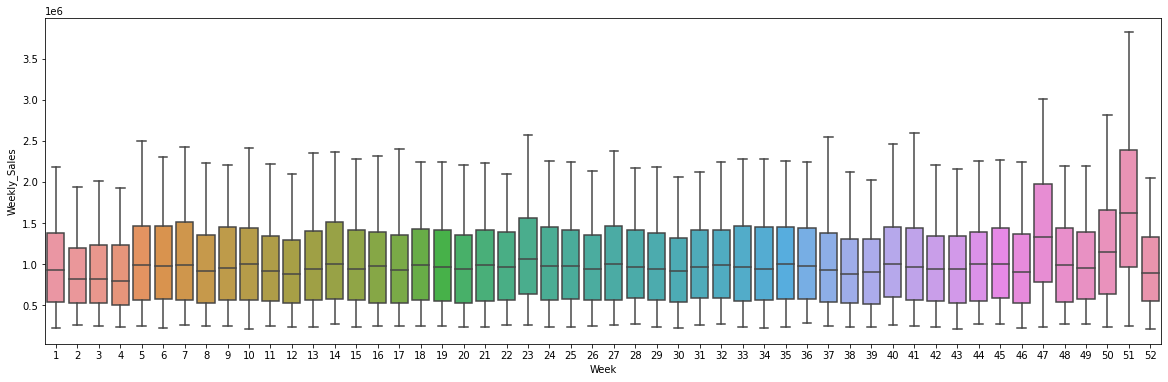

In [ ]:
# Promedio de Ventas Semanales según semana del año
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='Week', y="Weekly_Sales", data=dataset, showfliers=False)

Las ventas semanales son bastantes similares a lo largo del año. 
Tienen poca varianza y sólo vemos grandes aumentos en 2 semanas especiales: **thanksgiving y Navidad**.

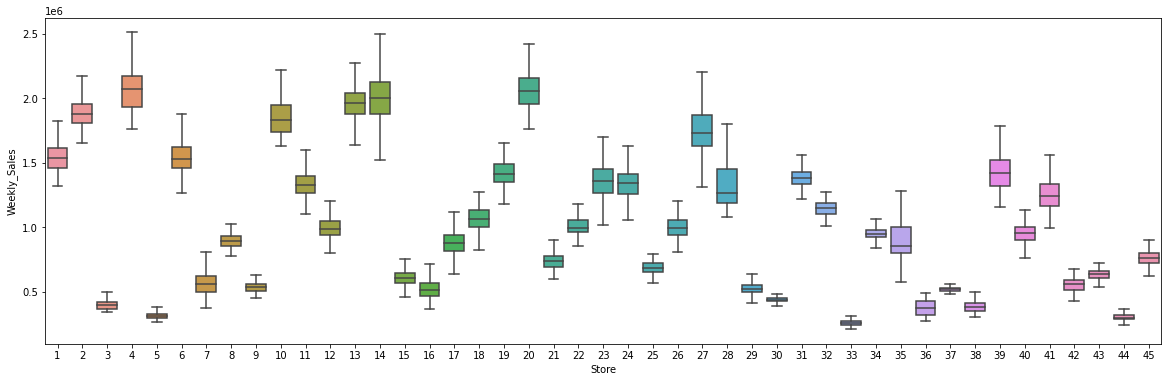

In [ ]:
# Promedio de Ventas Semanales según Store
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='Store', y="Weekly_Sales", data=dataset, showfliers=False)

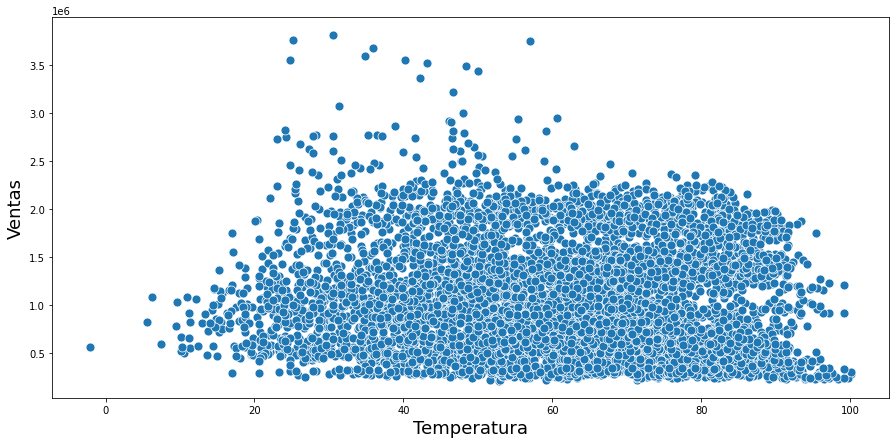

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=dataset.Temperature, y=dataset.Weekly_Sales, s=80);
sns.set_style('darkgrid')
plt.xlabel('Temperatura', fontsize=18)
plt.ylabel('Ventas', fontsize=18);

Holiday_Flag vs Weekly_Sales


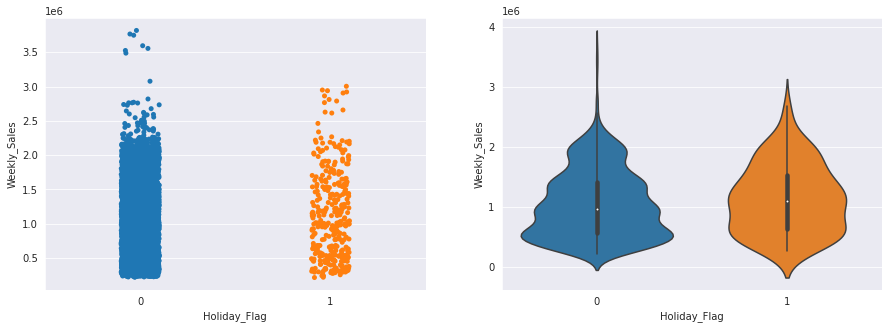

In [ ]:
print('Holiday_Flag vs Weekly_Sales')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
#En Azul son los datos de Entrenamiento y en naranja los de Test
sns.stripplot(y=y_train,x=X_train['Holiday_Flag'])
plt.subplot(1,2,2)
sns.violinplot(y=y_test,x=X_test['Holiday_Flag']);

**Podemos ver que los datos de test y train se comportan de manera similar y son congruentes entre si.**

## Aplicación de Modelos de Aprendizaje Automático Supervisado

Se propone implementar diferentes modelos de regresión **para el dataset seleccionado**, utilizando la librería Scikit-Learn (o la que consideren apropiada):

1. Support Vector Machines (SVM), probando distintos kernels para la regresión.
2. Árboles de Decisión. 
3. Random Forest.
4. Red neuronal.

En todos los casos verificar si los datos necesitan ser normalizados o no, y si tienen que utilizar todas las columnas o es necesario tomar sólo una que sea más representativa.

De estos tres modelos, cuál creen que es el más adecuado para nuestro caso de aplicación? Qué métricas utilizan para la elección?

**Elegir el modelo que consideren que mejor aplica a nuestro problema.**

Finalmente, para el modelo selecionado:

- Utilizar el método *Grid Search*, con *cross-validation* para profundizar en la búsqueda y selección de hiperparámetros.
- Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
   + Mean Absolute Error (MAE): Esta métrica de regresión es el valor medio de la diferencia absoluta entre el valor real y el valor predicho.
   + Mean Squared Error (MSE) : El error cuadrático medio (ECM) calcula el valor medio de la diferencia al cuadrado entre el valor real y el predicho para todos los puntos de datos. Todos los valores relacionados se elevan a la segunda potencia, por lo tanto, todos los valores negativos no se compensan con los positivos. 
   + R2 Score:  Esta métrica calcula cuán bien se adapta el modelo de regresión a los datos observados. 
     
- ¿Cuál consideran la métrica más apropiada para utilizar en nuestros modelos? ¿Por qué?

### 1. SVM

SVM necesita que los datos se normalicen (ver https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use)


#### SVR

In [ ]:
## Dudas: ¿Podemos no probar sin normalizar ya que la doc dice que hace falta normalizar?
### ¿Sería correcto decir que las SVR son malas para la predicción de este problema porque, al estar tan juntos entre sí las potenciales ventas semanales, resulta muy difícil para el modelo
### encontrar hiperplanos que los separen?
### ¿Sólo probamos con diferentes kernels pero el resto de hiperparámetros iguales? ¿O también probamos combinaciones de hiperparámetros? No cambiamos hiperparámetros
### ¿Cómo sé si debería tomar una sola columna o várias? ¿Probando o en función de algo indicado por el algoritmo? Tenemos que probar y justificar... Probar 
### Probar también si el rendimiento del modelo cambia con datos normalizados y no normalizados (no debería hacer falta para SVR, justificar con link)
# Kernels de SVR a probar
## Usamos MSLE porque es útil para valores a predecir que crecen exponencialmente, como ventas -> https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-logarithmic-error
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] # No se usa el kernel precomputed porque requiere matriz cuadrada, lo que implicaría sólo usar 11 muestras

# Guardar valores originales para bucle
X_train_original = X_train.copy(deep=True)
X_test_original = X_test.copy(deep=True)

# Listas de kernels, puntajes y columnas removidas
# En orden. O sea, scores[0] se corresponde con la combinación left_cols[0], used_kernels[0]
scores = []
left_cols = []
used_kernels = []

# Probar distintas columnas y kernels
for col in X_train_original.columns:
  # Dejar solo una columna para probar
  X_train = X_train.iloc[:, X_train.columns == col]
  X_test = X_test.iloc[:, X_test.columns == col]
  # Probamos con varios kernels
  for kernel in kernels:
    regr = make_pipeline(StandardScaler(), svm.SVR(kernel=kernel))
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    left_cols.append(col)
    used_kernels.append(kernel)
    scores.append(mean_squared_log_error(y_test, y_pred))

  # Reiniciar train y test
  X_train = X_train_original
  X_test = X_test_original

# Promabos los kernels usando TODAS las columnas
for kernel in kernels:
  regr = make_pipeline(StandardScaler(), svm.SVR(kernel=kernel))
  regr.fit(X_train, y_train)
  y_pred = regr.predict(X_test)
  left_cols.append('all')
  used_kernels.append(kernel)
  scores.append(mean_squared_log_error(y_test, y_pred))

# Obtener la mejor combinación kernel, columna para la métrica usada
results = pd.DataFrame({'kernel': used_kernels, 'column used': left_cols, 'score': scores})
results.iloc[results['score'].idxmin()]

kernel             poly
column used       Store
score          0.348857
Name: 1, dtype: object

#### NuSVR

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] # No se usa el kernel precomputed porque requiere matriz cuadrada, lo que implicaría sólo usar 11 muestras

# Guardar valores originales para bucle
X_train_original = X_train.copy(deep=True)
X_test_original = X_test.copy(deep=True)

# Listas de kernels, puntajes y columnas removidas
# En orden. O sea, scores[0] se corresponde con la combinación left_cols[0], used_kernels[0]
scores = []
left_cols = []
used_kernels = []

# Probar distintas columnas y kernels
for col in X_train_original.columns:
  # Dejar solo una columna para probar
  X_train = X_train.iloc[:, X_train.columns == col]
  X_test = X_test.iloc[:, X_test.columns == col]
  # Probamos con varios kernels
  for kernel in kernels:
    regr = make_pipeline(StandardScaler(), svm.NuSVR(kernel=kernel))
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    left_cols.append(col)
    used_kernels.append(kernel)
    scores.append(mean_squared_log_error(y_test, y_pred))

  # Reiniciar train y test
  X_train = X_train_original
  X_test = X_test_original

# Promabos los kernels usando TODAS las columnas
for kernel in kernels:
  regr = make_pipeline(StandardScaler(), svm.NuSVR(kernel=kernel))
  regr.fit(X_train, y_train)
  y_pred = regr.predict(X_test)
  left_cols.append('all')
  used_kernels.append(kernel)
  scores.append(mean_squared_log_error(y_test, y_pred))

# Obtener la mejor combinación kernel, columna para la métrica usada
results = pd.DataFrame({'kernel': used_kernels, 'column used': left_cols, 'score': scores})
results.iloc[results['score'].idxmin()]

kernel                 poly
column used    Unemployment
score               0.35235
Name: 25, dtype: object

#### LinearSVR

### 2. Árboles de Decisión

### 3. Random Forest

In [ ]:
# Guardar valores originales para bucle
X_train_original = X_train.copy(deep=True)
X_test_original = X_test.copy(deep=True)

# Listas de kernels, puntajes y columnas removidas
# En orden. O sea, scores[0] se corresponde con la combinación left_cols[0], used_kernels[0]
scores = []
left_cols = []

# Probar distintas columnas y kernels
for col in X_train_original.columns:
  # Dejar solo una columna para probar
  X_train = X_train.iloc[:, X_train.columns == col]
  X_test = X_test.iloc[:, X_test.columns == col]
  # Probamos con varios kernels
  for kernel in kernels:
    regr = make_pipeline(StandardScaler(), svm.NuSVR(kernel=kernel))
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    left_cols.append(col)
    used_kernels.append(kernel)
    scores.append(mean_squared_log_error(y_test, y_pred))

  # Reiniciar train y test
  X_train = X_train_original
  X_test = X_test_original

# Promabos los kernels usando TODAS las columnas
for kernel in kernels:
  regr = make_pipeline(StandardScaler(), svm.NuSVR(kernel=kernel))
  regr.fit(X_train, y_train)
  y_pred = regr.predict(X_test)
  left_cols.append('all')
  used_kernels.append(kernel)
  scores.append(mean_squared_log_error(y_test, y_pred))

# Obtener la mejor combinación kernel, columna para la métrica usada
results = pd.DataFrame({'kernel': used_kernels, 'column used': left_cols, 'score': scores})
results.iloc[results['score'].idxmin()]

### 4. Redes Neuronales

In [ ]:
#Importo sklearn.neural_network
#https://scikit-learn.org/stable/modules/neural_networks_supervised.html#tips-on-practical-use 
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

X_train_original = X_train.copy(deep=True)
X_test_original = X_test.copy(deep=True)

#Aplicar misma escala
scaler = StandardScaler() 
#Se realiza el fit solo en el train data
scaler.fit(X_train_original)
#Luego aplicamos las transformaciones tanto al train como al test
X_train_original = scaler.transform(X_train_original) 
X_test_original = scaler.transform(X_test_original) 

X_train_original, X_test_original, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)



### Elección del mejor modelo

### Evaluación de nuestro modelo elegido